In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from torch.func import vmap, jacrev
from tqdm import tqdm
import os
import random
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks import Callback
import math
from pydmd import DMD
from sklearn.preprocessing import MinMaxScaler
import warnings
from matplotlib import cm
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties

In [3]:
original = pd.read_csv('Non.csv', header=None).values
spdmd = pd.read_csv('Non_spdmd.csv', header=None).values
optdmd = pd.read_csv('Non_optdmd.csv', header=None).values
nbe = pd.read_csv('Non_nbe.csv', header=None).values
siren = pd.read_csv('Non_siren.csv', header=None).values
ar = pd.read_csv('Non_ar.csv', header=None).values
ode = pd.read_csv('Non_ode.csv', header=None).values

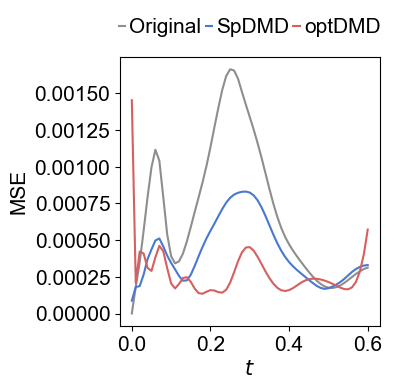

In [10]:
arial_font = FontProperties(fname="/root/.fonts/arial.ttf", size=15)

colors = ["#8E8E8E", "#4878CF", "#D65F5F"]

t = np.linspace(0, 0.6, 61)

plt.figure(figsize=(4, 4))

plt.plot(t, original, label='Original', color=colors[0], linewidth=1.5)
plt.plot(t, spdmd, label='SpDMD', color=colors[1], linewidth=1.5)
plt.plot(t, optdmd, label='optDMD', color=colors[2], linewidth=1.5)

plt.xlabel('$t$', fontproperties=arial_font, fontsize=15)
plt.ylabel('MSE', fontproperties=arial_font, fontsize=15)

plt.xticks(fontsize=15, fontproperties=arial_font)
plt.yticks(fontsize=15, fontproperties=arial_font)

plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),
    borderaxespad=0.3,
    ncol=3,
    columnspacing=0.2,
    handletextpad=0.2,
    handlelength=0.3,
    frameon=False,
    fontsize=8,
    prop=arial_font
)

plt.grid(False)
plt.tight_layout()
plt.savefig("extension1.svg", format='svg', bbox_inches='tight')
plt.show()

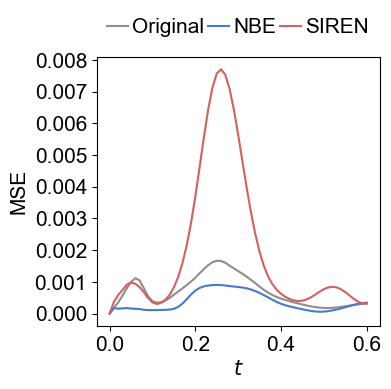

In [12]:
t = np.linspace(0, 0.6, 61)

plt.figure(figsize=(4, 4))

plt.plot(t, original, label='Original', color=colors[0], linewidth=1.5)
plt.plot(t, nbe, label='NBE', color=colors[1], linewidth=1.5)
plt.plot(t, siren, label='SIREN', color=colors[2], linewidth=1.5)

plt.xlabel('$t$', fontproperties=arial_font, fontsize=15)
plt.ylabel('MSE', fontproperties=arial_font, fontsize=15)

plt.xticks(fontsize=15, fontproperties=arial_font)
plt.yticks(fontsize=15, fontproperties=arial_font)

plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),
    borderaxespad=0.3,
    ncol=3,
    columnspacing=0.2,
    handletextpad=0.2,
    handlelength=1.0,
    frameon=False,
    fontsize=8,
    prop=arial_font
)

plt.grid(False)
plt.tight_layout()
plt.savefig("extension2.svg", format='svg', bbox_inches='tight')
plt.show()

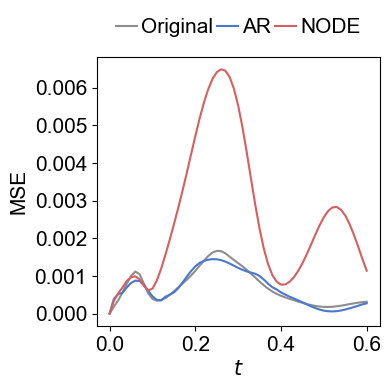

In [13]:
t = np.linspace(0, 0.6, 61)

plt.figure(figsize=(4, 4))

plt.plot(t, original, label='Original', color=colors[0], linewidth=1.5)
plt.plot(t, ar, label='AR', color=colors[1], linewidth=1.5)
plt.plot(t, ode, label='NODE', color=colors[2], linewidth=1.5)

plt.xlabel('$t$', fontproperties=arial_font, fontsize=15)
plt.ylabel('MSE', fontproperties=arial_font, fontsize=15)

plt.xticks(fontsize=15, fontproperties=arial_font)
plt.yticks(fontsize=15, fontproperties=arial_font)

plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),
    borderaxespad=0.3,
    ncol=3,
    columnspacing=0.2,
    handletextpad=0.2,
    handlelength=1.0,
    frameon=False,
    fontsize=8,
    prop=arial_font
)

plt.grid(False)
plt.tight_layout()
plt.savefig("extension3.svg", format='svg', bbox_inches='tight')
plt.show()